# Plotting

Elements of Data Science

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)

### Goals

This notebook presents ways to create figures and graphs, more generally called "data visualizations".  As examples, we'll generate three figures:

* We'll replicate a figure from the Pew Research Center that shows changes in religious affiliation in the U.S. over time.

* We'll replicate the figure from *The Economist* that shows the prices of sandwiches in Boston and London (we saw this data back in Notebook 03).

* We'll make a plot to test Zipf's law, which describes the relationship between word frequencies and their ranks.

With the tools in this notebook, you can generate a variety of simple graphs.  We will see more visualization tools in later notebooks.

But before we get started with plotting, we need a new language feature: keyword arguments.

## Keyword arguments

When you call most functions, you have to provide values.  For example, when you call `np.exp`, the value you provide is a number: 

In [1]:
import numpy as np

np.exp(1)

2.718281828459045

When you call `np.power`, you have to provide two numbers:

In [2]:
np.power(10, 6)

1000000

The values you provide are called "arguments".  Specifically, the values in these examples are "positional arguments" because their position determines how they are used.

In the second example, `power` computes `10` to the sixth power, not `6` to the 10th power because of the order of the arguments.

Many functions also take "keyword arguments", which are optional.  For example, we have previously used `int` to convert a string to an integer.

In [3]:
int('21')

21

By default, `int` assumes that the number is in base 10.  But you can provide a keyword argument that specifies a different base.

For example, the string `'21'`, interpreted in base 8, represents the number `2 * 8 + 1 = 17`.  Here's how we do this conversion using `int`.

In [4]:
int('21', base=8)

17

The string `'21'` is a positional argument.  The integer value `8` is a keyword argument, with the keyword `base`.

Specifying a keyword argument looks like an assignment statement, but it does not create a new variable.

In [5]:
base

NameError: name 'base' is not defined

And when you specify a keyword argument, you don't choose the variable name.  In this example, the keyword name, `base`, is part of the definition of `int`.  If you specify another keyword name, you get an error.

In [6]:
int('123', bass=11)

TypeError: 'bass' is an invalid keyword argument for int()

**Exercise:** Use `int` to compute the value of `"123"` interpreted in base 5.  What happens if you try to interpret `"123"` as a base 3 number?

In [7]:
# Solution

int('123', base=5)

38

In [8]:
# Solution

int('123', base=3)

ValueError: invalid literal for int() with base 3: '123'

**Exercise:** The `print` function takes a keyword argument called `end` that specifies the character it prints at the end of the line.  By default, `end` is the newline character, `\n`.  So if you call `print` more than once, the results normally appear on separate lines, like this:

In [9]:
for x in [1, 2, 3]:
    print(x)

1
2
3


Modify the previous example so it prints the elements of the list, all on one line, with spaces between them.

Then modify it to print an open bracket at the beginning and a close bracket and newline at the end.

In [10]:
# Solution

print('[', end='')
for x in [1, 2, 3]:
    print(x, end=' ')
print(']')

[1 2 3 ]


## Religious affiliation

Now we're ready to make some graphs.

In October 2019 the Pew Research Center published "[In U.S., Decline of Christianity Continues at Rapid Pace](https://www.pewforum.org/2019/10/17/in-u-s-decline-of-christianity-continues-at-rapid-pace/): An update on America's changing religious landscape".

It includes this figure, which shows changes in religious affiliation among adults in the U.S. over the previous 10 years.

<img src="https://github.com/AllenDowney/ElementsOfDataScience/raw/master/figs/pew_religion_figure1.png" width="300">

As an exercise, we'll replicate this figure.  It shows results from two sources, Religious Landscape Studies and Pew Research Political Surveys.  The political surveys provide data from more years, so we'll focus on that.

[The data from the figure are available directly from Pew Research](https://www.pewforum.org/wp-content/uploads/sites/7/2019/10/Detailed-Tables-v1-FOR-WEB.pdf), but they are in a PDF document.  Later you'll learn how to extract data from PDF documents, but for now we'll enter the data by hand.

In [11]:
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [12]:
christian = [77, 76, 75, 73, 73, 71, 69, 68, 67, 65]

In [13]:
unaffiliated = [17, 17, 19, 19, 20, 21, 24, 23, 25, 26]

The library we'll use for plotting is Matplotlib; more specifically, we'll use a part of it called Pyplot, which we'll import with the nickname `plt`.

In [14]:
import matplotlib.pyplot as plt

Pyplot provides a function called `plot` that makes a line plot.  It takes two sequences as arguments, the `x` values and the `y` values.  The sequences can be tuples, lists, or arrays.

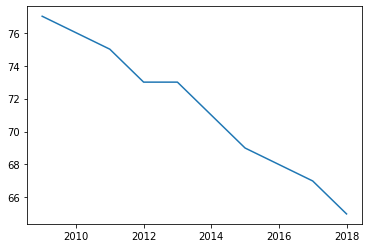

In [15]:
plt.plot(year, christian)

In addition to the plot, Jupyter also displays the result from `plt.plot`, which is a value that represents the plotted line.

For now we won't do anything with this value.  If you prefer not to see it, you can put a semi-colon at the end of the line to suppress it.

If you plot multiple lines in a single cell, they appear on the same axes.

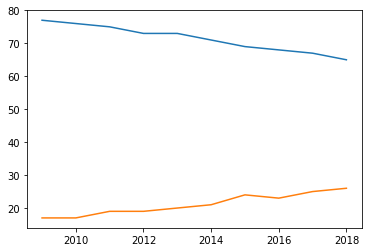

In [16]:
plt.plot(year, christian)
plt.plot(year, unaffiliated);

In this example, plotting them on the same axes makes it possible to compare them directly.

However, notice that Pyplot chooses the range for the axes automatically; in this example the `y` axis starts around 15, not zero.  

As a result, it provides a misleading picture, making the ratio of the two lines look bigger than it really is.

We can set the limits of the `y` axis using the function `plt.ylim`.  The argument is a list with two values, the lower bound and the upper bound.

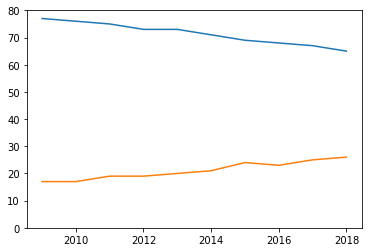

In [17]:
plt.plot(year, christian)
plt.plot(year, unaffiliated)

plt.ylim([0, 80]);

That's better, but this graph is missing some of the most important elements: labels for the axes, and a title.  

## Decorating the axes

To label the axes and add a title, we'll use Pyplot functions `xlabel`, `ylabel`, and `title`.  All of them take strings as arguments.

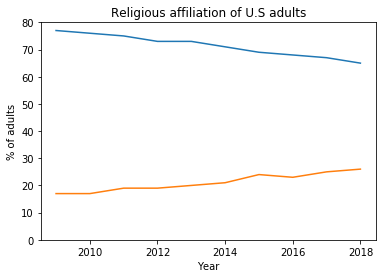

In [18]:
plt.plot(year, christian)
plt.plot(year, unaffiliated)

plt.ylim([0, 80])
plt.xlabel('Year')
plt.ylabel('% of adults')
plt.title('Religious affiliation of U.S adults');

Now let's add another important element, a legend that indicates which line is which.

To do that, we add a label to each line, using the keyword argument `label`.

Then we call `plt.legend` to create the legend.

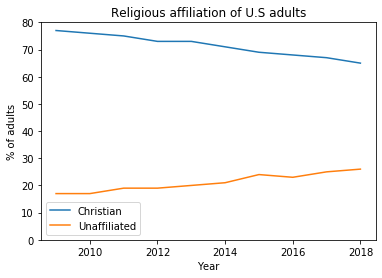

In [19]:
plt.plot(year, christian, label='Christian')
plt.plot(year, unaffiliated, label='Unaffiliated')

plt.ylim([0, 80])
plt.xlabel('Year')
plt.ylabel('% of adults')
plt.title('Religious affiliation of U.S adults')
plt.legend();

**Exercise:** The orginal figure plots lines between the data points, but it also plots "markers" showing the location of each data point.  It is generally good practice to include markers, especially if data are not available for every year.

Modify the previous example to include a keyword argument `marker` with the string value `'o'`, which indicates that you want to plot circles as markers.

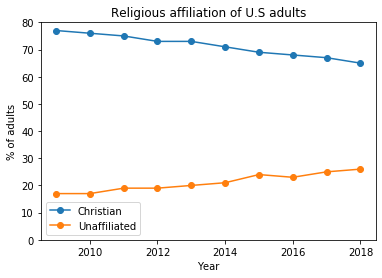

In [20]:
# Solution

plt.plot(year, christian, marker='o', label='Christian')
plt.plot(year, unaffiliated, marker='o', label='Unaffiliated')

plt.ylim([0, 80])
plt.xlabel('Year')
plt.ylabel('% of adults')
plt.title('Religious affiliation of U.S adults')
plt.legend();

**Exercise:** In the original figure, the line labelled `'Christian'` is red and the line labeled `'Unaffiliated'` is grey.

Find the online documentation of `plt.plot` and figure out how to use keyword arguments to specify colors.  Choose colors to (roughly) match the original figure.

The `legend` function takes a keyword argument that speficies the location of the legend.  Read the documentation of this function and move the legend to the center left of the figure.

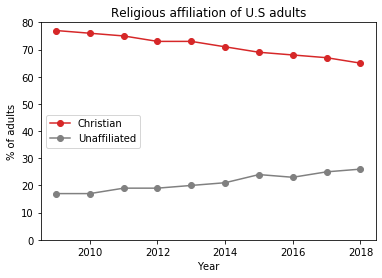

In [21]:
# Solution

plt.plot(year, christian, marker='o', color='C3', label='Christian')
plt.plot(year, unaffiliated, marker='o', color='gray', label='Unaffiliated')

plt.ylim([0, 80])
plt.xlabel('Year')
plt.ylabel('% of adults')
plt.title('Religious affiliation of U.S adults')
plt.legend(loc='center left');

## Sandwiches

In a previous notebook we used data from an article in *The Economist* comparing sandwich prices in Boston and London: "[Why Americans pay more for lunch than Britons do](https://www.economist.com/finance-and-economics/2019/09/07/why-americans-pay-more-for-lunch-than-britons-do)"

The article includes this graph showing prices of several sandwiches in the two cities:

<img src="https://github.com/AllenDowney/ElementsOfDataScience/raw/master/figs/20190907_FNC941.png" width="400"/>

As an exercise, let's see if we can replicate this figure.

Here's the data from the article again: the names of the sandwiches and the price list for each city.

In [22]:
name_list = ['Lobster roll',
    'Chicken caesar',
    'Bang bang chicken',
    'Ham and cheese',
    'Tuna and cucumber',
    'Egg'
]

In [23]:
boston_price_list = [9.99, 7.99, 7.49, 7, 6.29, 4.99]

In [24]:
london_price_list = [7.5, 5, 4.4, 5, 3.75, 2.25]

In the previous section we plotted percentages on the `y` axis versus time on the `x` axis.  

Now we want to plot the sandwich names on the `y` axis and the prices on the `x` axis.  Here's how:

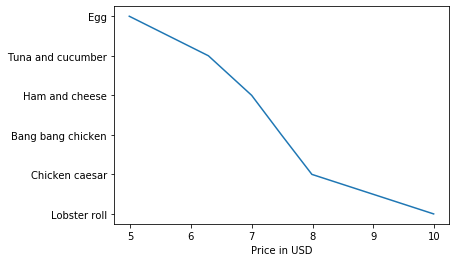

In [25]:
plt.plot(boston_price_list, name_list)
plt.xlabel('Price in USD');

`name_list` is a list of strings; Pyplot orders them from top to bottom, equally spaced.

By default Pyplot connects the points with lines, but in this example the lines don't make sense because the sandwich names are "categorical", not numerical.  You can't interpolate between an egg sandwich and a tuna sandwich.

We can turn on markers and turn off lines with keyword arguments.

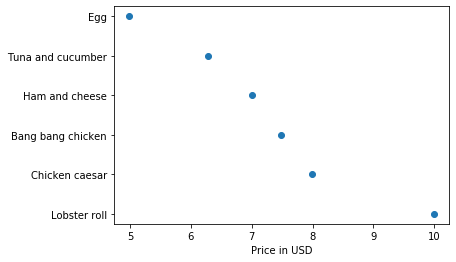

In [26]:
plt.plot(boston_price_list, name_list, marker='o', linestyle='')
plt.xlabel('Price in USD');

Or we can do the same thing more concisely by providing a "format string" as a positional argument.  You can read the documentation of `plt.plot` to learn more about format strings.

I added a title at the same time.

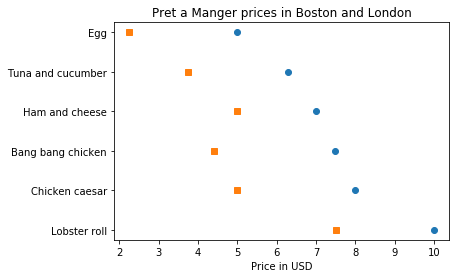

In [27]:
plt.plot(boston_price_list, name_list, 'o')
plt.plot(london_price_list, name_list, 's')

plt.xlabel('Price in USD')
plt.title('Pret a Manger prices in Boston and London');

To approximate the colors in the original figure, I use the strings `'C3'` and `'C0'` to specify colors from the default color sequence.  [You can read the documentation to learn more about specifying colors in Pyplot](https://matplotlib.org/3.1.1/tutorials/colors/colors.html).

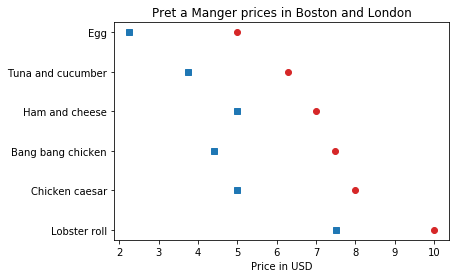

In [28]:
plt.plot(boston_price_list, name_list, 'o', color='C3')
plt.plot(london_price_list, name_list, 's', color='C0')

plt.xlabel('Price in USD')
plt.title('Pret a Manger prices in Boston and London');

To connect the dots with lines, I use `plt.hlines`, which draws horizontal lines.  It takes three arguments: a sequence of values on the `y` axis, which are the sandwich names in this example, and two sequences of values on the `x` axis, which are the London prices and Boston prices in this example.

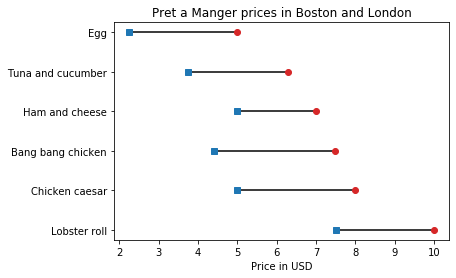

In [29]:
plt.plot(boston_price_list, name_list, 'o', color='C3')
plt.plot(london_price_list, name_list, 's', color='C0')

plt.hlines(name_list, london_price_list, boston_price_list)

plt.xlabel('Price in USD')
plt.title('Pret a Manger prices in Boston and London');

**Exercise:** To finish off this example, add a legend that identifies the London and Boston prices.  Remember that you have to add a `label` keyword each time you call `plt.plot`, and then call `plt.legend`.

Notice that the sandwiches in our figure are in the opposite order of the sandwiches in the original figure.  There is a Pyplot function that inverts the `y` axis; see if you can find it and use it to reverse the order of the sandwich list.

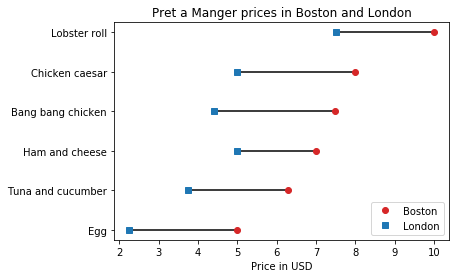

In [30]:
# Solution

plt.plot(boston_price_list, name_list, 'o', color='C3', label='Boston')
plt.plot(london_price_list, name_list, 's', color='C0', label='London')

plt.hlines(name_list, london_price_list, boston_price_list)

plt.xlabel('Price in USD')
plt.title('Pret a Manger prices in Boston and London')
plt.legend(loc='lower right')
plt.gca().invert_yaxis()

## Zipf's law

In the previous notebook we downloaded *War and Peace* from [Project Gutenberg](https://www.gutenberg.org) and counted the number of lines and words.

Then we used a dictionary to count the number of unique words and the number of times each one appears.

Now we'll use those results to generate a "Zipf plot", which shows the frequency of the words on the `y` axis, ordered from the most common word to the least.

First, let's download the book again.  If you run the following cell, it checks to see whether you already have a file named `2600-0.txt`; if not, it uses `wget` to copy a book from Project Gutenberg to your computer.  

In [31]:
import os

if not os.path.exists('2600-0.txt'):
    !wget https://www.gutenberg.org/files/2600/2600-0.txt

Here's the code from the previous notebook that loops through the book and makes a dictionary that contains all punctuation characters.  Again, you don't have to understand all of the details here.

In [32]:
import unicodedata

fp = open('2600-0.txt')
punc_marks = {}
for line in fp:
    for x in line:
        category = unicodedata.category(x)
        if category[0] == 'P':
            punc_marks[x] = 1
        
all_punctuation = ''.join(punc_marks)
print(all_punctuation)

,.-:[#]*/“’—‘!?”;()%@


And here's a solution to one of the previous exercises.  It loops through the book and makes a dictionary that maps from each word to the number of times it appears.

In [33]:
# Solution

first_line = "CHAPTER I\n"
last_line = "End of the Project Gutenberg EBook of War and Peace, by Leo Tolstoy\n"

fp = open('2600-0.txt')
for line in fp:
    if line == first_line:
        break

unique_words = {}
for line in fp:
    if line == last_line:
        break
        
    for word in line.split():
        word = word.lower()
        word = word.strip(all_punctuation)
        if word in unique_words:
            unique_words[word] += 1
        else:
            unique_words[word] = 1

## Frequencies and ranks

[According to Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law), Zipf's law

>was originally formulated in terms of quantitative linguistics, stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

To see if this law holds for the words in *War and Peace*, we'll make a plot that shows:

* The frequency of each word on the `y` axis, and

* The rank of each word on the `x` axis, where the rank of the most frequent word is 1, the rank of the frequent most common word is 2, etc.

In `unique_words`, the keys are words and the values are their frequencies.  We can use the `values` function to get the values from the dictionary.  The result has the type `dict_values`: 

In [34]:
freqs = unique_words.values()
type(freqs)

dict_values

Before we plot them, we have to sort them, but the `sort` function doesn't work with `dict_values`:

In [35]:
freqs.sort()

AttributeError: 'dict_values' object has no attribute 'sort'

We can use `list` to make a list of frequencies:

In [36]:
freqs = list(unique_words.values())
type(freqs)

list

And the `sort` function works with lists.  By default it sorts in ascending order, but we can pass a keyword argument to reverse the order.

In [37]:
freqs.sort(reverse=True)

Now, for the ranks, we need a sequence that counts from 1 to `n`, where `n` is the number of elements in `freqs`.  We can use the `range` function, which returs a value with type `range`.

As a small example, here's the range from 1 to 5.

In [38]:
range(1, 5)

range(1, 5)

However, there's a catch.  If we use the range to make a list, we see that "the range from 1 to 5" includes 1, but it doesn't include 5.

In [39]:
list(range(1, 5))

[1, 2, 3, 4]

That might seem strange, but it is [often more convenient](https://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html) to use `range` when it is defined this way, rather than what might seem like the more natural way.

Anyway, we can get what we want by increasing the second argument by one:

In [40]:
list(range(1, 6))

[1, 2, 3, 4, 5]

So, finally, we can make a range that represents the ranks from `1` to `n`:

In [41]:
n = len(freqs)
ranks = range(1, n+1)
ranks

range(1, 20477)

And now we can plot the frequencies versus the ranks:

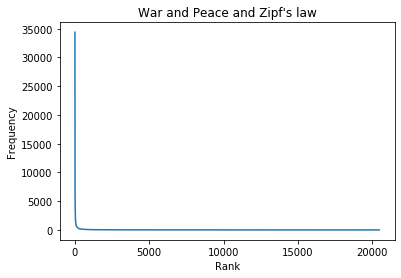

In [42]:
plt.plot(ranks, freqs)

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("War and Peace and Zipf's law");

## Logarithmic scales

The few most common words are very common, and the great majority of words are much less common.  So that's consistent with Zipf's law, but Zipf's law is more specific.  It claims that the frequencies should be inversely proportional to the ranks.  If that's true, we can write the mathematical relation:

$f = k / r$

where $r$ is the rank of a word, $f$ is its frequency, and $k$ is an unknown constant of proportionality.  If we take the log of both sides, we get this relation:

$\log f = \log k - \log r$

This relation implies that if we plot $f$ versus $r$ on a log-log scale, we expect to see a straight line with intercept at $\log k$ and slope -1.

We can use `plt.xscale` to plot the `x` axis on a log scale.

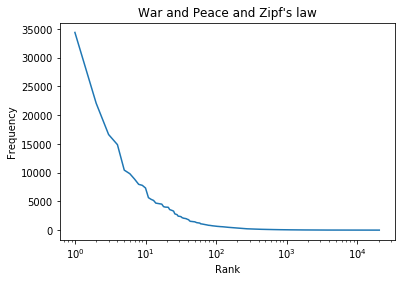

In [43]:
plt.plot(ranks, freqs)

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("War and Peace and Zipf's law")
plt.xscale('log')

And `plt.yscale` to plot the `y` axis on a log scale.

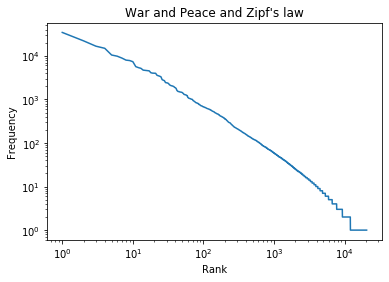

In [44]:
plt.plot(ranks, freqs)

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("War and Peace and Zipf's law")
plt.xscale('log')
plt.yscale('log')

The result is not quite a straight line, but it is close.  We can get a sense of the slope by connecting the end points with a line.

In [45]:
xs = [ranks[0], ranks[-1]]
xs

[1, 20476]

In [46]:
ys = [freqs[0], freqs[-1]]
ys

[34388, 1]

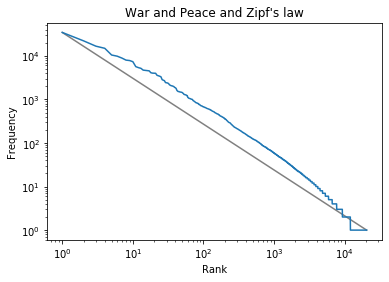

In [47]:
plt.plot(xs, ys, color='gray')
plt.plot(ranks, freqs)

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("War and Peace and Zipf's law")
plt.xscale('log')
plt.yscale('log')

The slope of this line is the "rise over run", that is, the difference on the `y` axis divided by the distance on the `x` axis.

We can compute the rise using `np.log` to compute the log of the first and last values:

In [48]:
np.log(ys)

array([10.44546295,  0.        ])

Then we can use `np.diff` to compute the difference between the elements:

In [49]:
np.diff(np.log(ys))

array([-10.44546295])

**Exercise:** Compute the run, that is, the difference between the logs of `xs`, and the slope of the grey line.  Is it close to -1, as Zipf's law predicts?

In [50]:
np.diff(np.log(ys)) / np.diff(np.log(xs))

array([-1.05222663])